### Perceptron
A Perceptron is a simple type of artificial neural network algorithm developed by Frank Rosenblatt in 1957. It's the basic unit of a neural network, taking multiple binary inputs and producing a single binary output. It computes a weighted sum of its input, applies an activation function, and produces an output.

Perceptron vs. Neuron:

Perceptron: Refers specifically to the algorithm developed by Rosenblatt, typically using a step function as the activation.
Neuron: A more general term used in the context of biological and artificial neural networks. It encompasses various activation functions beyond the step function.
![SNN](images/snn.png) 


#### Perceptron with the threshold 

In [22]:
import numpy as np
# Sample data
input_data = np.array([2, 3, 4])
weights = np.array([0.5, -0.5, 0.3])
bias = -0.2
# Calculate the weighted sum
weighted_sum = np.dot(input_data, weights) + bias
# Apply the step function
if weighted_sum > 0:
    prediction = 1
else:
    prediction = 0
print("Prediction:", prediction)

Prediction: 1


#### Implement the Perceptron Algorithm with a sigmoid activation function on OR problem

In [20]:
import numpy as np 
class SigmoidPerceptron: 
    def __init__(self, num_inputs): 
        self.weights = np.random.rand(num_inputs) 
        self.bias = np.random.rand() 
    def sigmoid(self, x): 
        return 1 / (1 + np.exp(-x)) 
    def predict(self, inputs): 
        weighted_sum = np.dot(inputs, self.weights) + self.bias 
        return self.sigmoid(weighted_sum) 
    def train(self, inputs, target, learning_rate=0.1): 
        prediction = self.predict(inputs) 
        error = target - prediction 
        self.weights += learning_rate * error * inputs 
        self.bias += learning_rate * error 
# Example usage: 
# Create a SigmoidPerceptron with 2 inputs 
perceptron = SigmoidPerceptron(2) 
# Train the perceptron to learn the OR problem 
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
targets = np.array([0, 1, 1, 1]) 
for _ in range(1000): 
    for i in range(len(data)): 
        perceptron.train(data[i], targets[i]) 
# Test the trained perceptron 

 
for i in range(len(data)): 
    prediction = perceptron.predict(data[i]) 
    print(f"Input: {data[i]}, Target: {targets[i]}, Prediction: {prediction}") 

Input: [0 0], Target: 0, Prediction: 0.05092333699959286
Input: [0 1], Target: 1, Prediction: 0.9798350106946809
Input: [1 0], Target: 1, Prediction: 0.9797846033491464
Input: [1 1], Target: 1, Prediction: 0.999977217448247


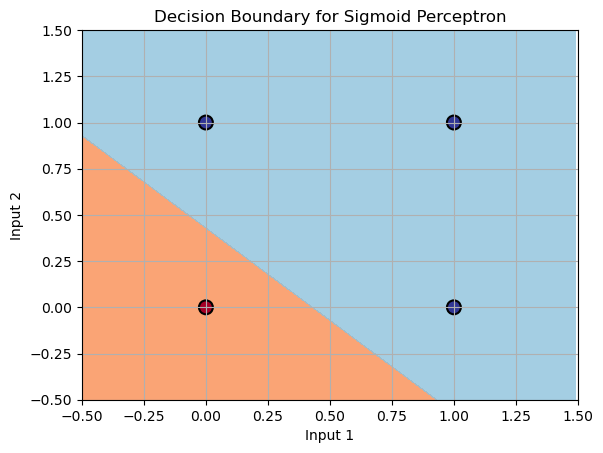

In [21]:
# Visualization of decision boundary
import matplotlib.pyplot as plt
def plot_decision_boundary(perceptron, data, targets):
    # Create a grid of points
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict values for the grid
    Z = np.array([perceptron.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdYlBu", alpha=0.8)

    # Plot original data points
    plt.scatter(data[:, 0], data[:, 1], c=targets, edgecolors="k", linewidth=1.5, cmap="RdYlBu", marker='o', s=100)

    # Labeling the plot
    plt.title('Decision Boundary for Sigmoid Perceptron')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(perceptron, data, targets)

#### Perceptron for XOR problem with sigmoid

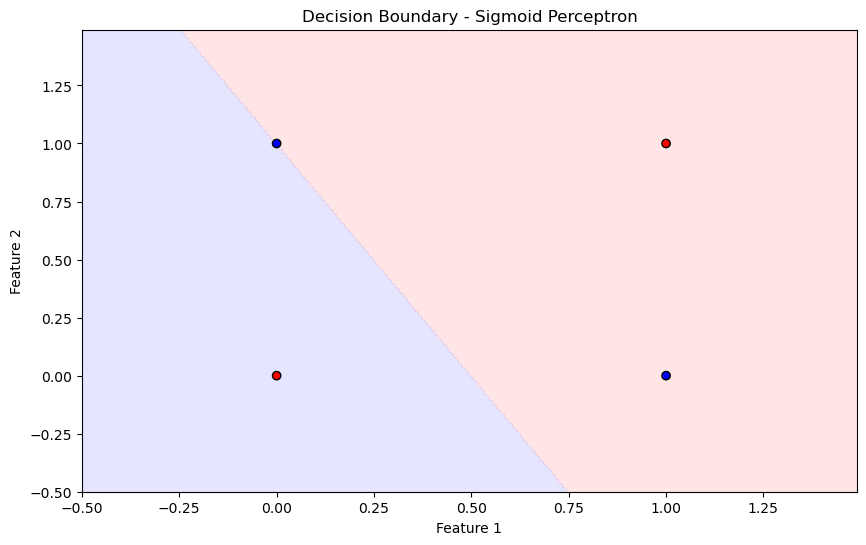

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Sigmoid Perceptron implementation
class Perceptron_Sigmoid:
    def __init__(self, input_size, learning_rate=0.1, epochs=10000):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                # Forward pass
                linear_output = np.dot(xi, self.weights[1:]) + self.weights[0]
                output = self.sigmoid(linear_output)
                
                # Backward pass
                error = target - output
                update = self.learning_rate * error * output * (1 - output)
                self.weights[1:] += update * xi
                self.weights[0] += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.sigmoid(linear_output) > 0.5

# Define function to plot decision boundaries
def plot_decision_boundary(pred_func, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict classifications for each point in the mesh grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


# Train and plot decision boundaries
perceptron_sigmoid = Perceptron_Sigmoid(input_size=2)
perceptron_sigmoid.fit(X, y)
plot_decision_boundary(perceptron_sigmoid.predict, X, y, "Decision Boundary - Sigmoid Perceptron")


In [5]:
#Task 1 b solution 

In [2]:
# ReLU Perceptron implementation
class Perceptron_ReLU:
    def __init__(self, input_size, learning_rate=0.1, epochs=10000):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def relu(self, x):
        return np.maximum(0, x)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                # Forward pass
                linear_output = np.dot(xi, self.weights[1:]) + self.weights[0]
                output = self.relu(linear_output)
                
                # Backward pass
                error = target - output
                update = self.learning_rate * error * (linear_output > 0).astype(float)
                self.weights[1:] += update * xi
                self.weights[0] += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.relu(linear_output) > 0.5


In [3]:

# Define function to plot decision boundaries
def plot_decision_boundary(pred_func, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict classifications for each point in the mesh grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [4]:
perceptron_relu = Perceptron_ReLU(input_size=2)
perceptron_relu.fit(X, y)
plot_decision_boundary(perceptron_relu.predict, X, y, "Decision Boundary - ReLU Perceptron")


NameError: name 'np' is not defined